In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.enable_eager_execution()



1.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
type(train_images)

numpy.ndarray

In [4]:
train_images.shape


(60000, 28, 28)

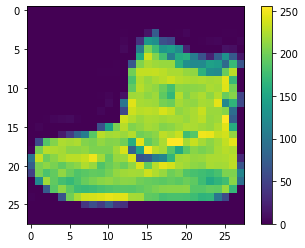

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


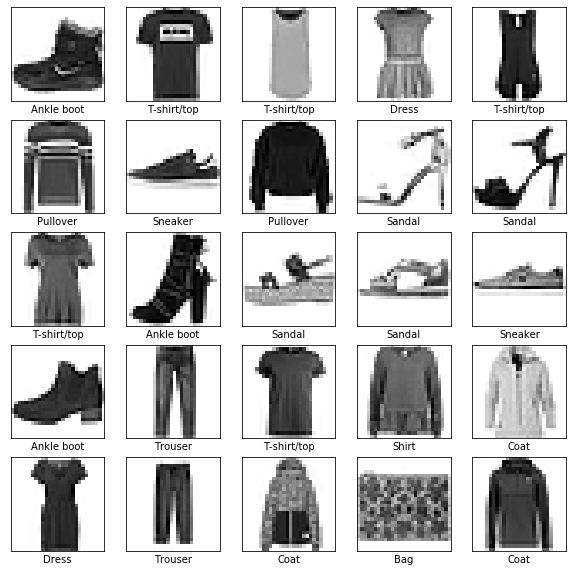

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.fit(train_images, train_labels, epochs=20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2311 - acc: 0.9136
Epoch 2/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2220 - acc: 0.9170
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2153 - acc: 0.9194
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2108 - acc: 0.9216
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2049 - acc: 0.9233
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2003 - acc: 0.9250
Epoch 7/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1938 - acc: 0.9273
Epoch 8/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1862 - acc: 0.9308
Epoch 9/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1818 - acc: 0.9316
Epoch 10/20
60000/60000 [==============================] - 

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/1 - 0s - loss: 0.3768 - acc: 0.8812

Test accuracy: 0.8812


In [0]:
predictions = model.predict(test_images)


In [15]:
predictions[0]


array([1.7993075e-08, 2.2012968e-16, 8.2191182e-10, 1.2838088e-24,
       3.7492325e-17, 9.1085832e-07, 1.2310836e-12, 1.7029535e-03,
       1.2665192e-12, 9.9829608e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])


9

In [19]:
print(class_names[9])
test_labels[0]


Ankle boot


9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


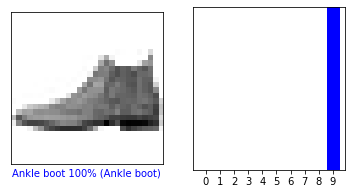

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


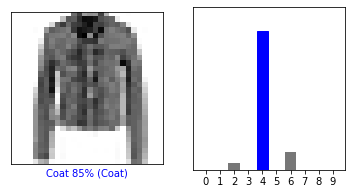

In [23]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


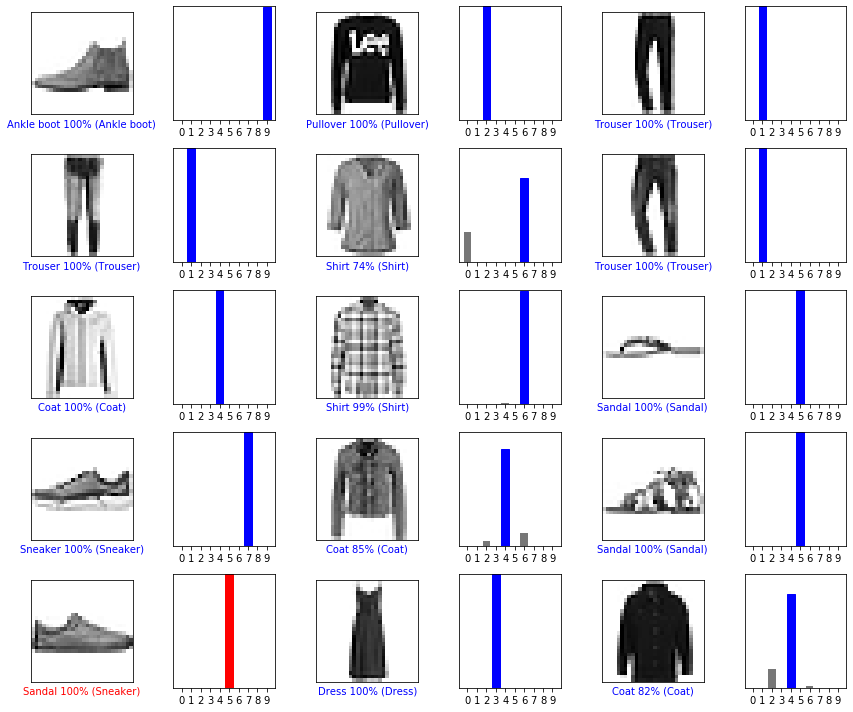

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [56]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)


(28, 28)


In [57]:
# Add the image to a batch where it's the only member.
img_0 = (np.expand_dims(img,0))

print(img_0.shape)
# np.delete(img,10)

(1, 28, 28)


In [58]:
predictions_single = model.predict(img_0)

print(predictions_single)


[[1.7993075e-08 2.2012883e-16 8.2191182e-10 1.2837990e-24 3.7492325e-17
  9.1085832e-07 1.2310790e-12 1.7029535e-03 1.2665239e-12 9.9829608e-01]]


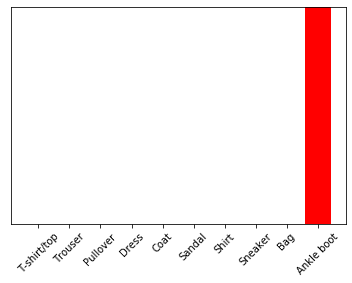

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [60]:
np.argmax(predictions_single[0])


9